In [1]:
!pip install seaborn

In [2]:
!pip install numpy

In [3]:
!pip install matplotlib

In [4]:
!pip install pandas

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Affordable_and_Available_Rental_Units_per_100_Households

## Step 1: Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

##  Step 2: Load dataset

In [13]:
dataset = pd.read_csv(r"D:\CSE--BOOK--SEM\CSE 2-2\CSE 2-2\Stat_31\Affordable_and_Available_Rental_Units_per_100_Households.csv",encoding='unicode_escape')

In [10]:
print("Dataset Head:\n", dataset.head())

Dataset Head:
    OBJECTID   INCOME  YEAR  Affordable_Unavailable  \
0         1  0 - 30%  2006               12.751806   
1         2  0 - 30%  2007               15.531473   
2         3  0 - 30%  2008               16.462289   
3         4  0 - 30%  2009               12.914391   
4         5  0 - 30%  2010               14.181818   

   Affordable_Available__Rent_Burd  Affordable_Available__Not_Rent_    Vacant  \
0                        17.681316                        20.990994  0.000000   
1                        15.394893                        14.824822  0.896675   
2                        20.849455                        16.816477  1.729270   
3                        16.972518                        16.104198  0.444604   
4                        14.287469                        16.732187  0.000000   

   Affordable_Available  
0             38.672310  
1             31.116390  
2             39.395202  
3             33.521320  
4             31.019656  


In [15]:
dataset.shape

(153, 8)

## Step 3: Clean the Dataset

In [75]:
dataset.columns

Index(['OBJECTID', 'INCOME', 'YEAR', 'Unavailable', 'Rent_Burd', 'Not_Rent',
       'Vacant', 'Affordable_Available'],
      dtype='object')

In [25]:
#rename column
dataset.rename(columns={'ï»¿OBJECTID':'OBJECTID'}, inplace=True)
dataset.rename(columns={'Affordable_Unavailable': 'Unavailable'}, inplace=True)
dataset.rename(columns={'Affordable_Available__Rent_Burd': 'Rent_Burd'}, inplace=True)
dataset.rename(columns={'Affordable_Available__Not_Rent_': 'Not_Rent'}, inplace=True)

In [26]:
dataset.head()

,OBJECTID,INCOME,YEAR,Unavailable,Rent_Burd,Not_Rent,Vacant,Affordable_Available
0,1,0 - 30%,2006,12.751806,17.681316,20.990994,0.000000,38.672310
1,2,0 - 30%,2007,15.531473,15.394893,14.824822,0.896675,31.116390
2,3,0 - 30%,2008,16.462289,20.849455,16.816477,1.729270,39.395202
3,4,0 - 30%,2009,12.914391,16.972518,16.104198,0.444604,33.521320
4,5,0 - 30%,2010,14.181818,14.287469,16.732187,0.000000,31.019656


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              153 non-null    int64  
 1   INCOME                153 non-null    object 
 2   YEAR                  153 non-null    int64  
 3   Unavailable           153 non-null    float64
 4   Rent_Burd             153 non-null    float64
 5   Not_Rent              153 non-null    float64
 6   Vacant                153 non-null    float64
 7   Affordable_Available  153 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 9.7+ KB


In [28]:
dataset = dataset.head()
dataset

,OBJECTID,INCOME,YEAR,Unavailable,Rent_Burd,Not_Rent,Vacant,Affordable_Available
0,1,0 - 30%,2006,12.751806,17.681316,20.990994,0.000000,38.672310
1,2,0 - 30%,2007,15.531473,15.394893,14.824822,0.896675,31.116390
2,3,0 - 30%,2008,16.462289,20.849455,16.816477,1.729270,39.395202
3,4,0 - 30%,2009,12.914391,16.972518,16.104198,0.444604,33.521320
4,5,0 - 30%,2010,14.181818,14.287469,16.732187,0.000000,31.019656


In [62]:
#check for null values
pd.isnull(dataset).sum()

OBJECTID                0
INCOME                  0
YEAR                    0
Unavailable             0
Rent_Burd               0
Not_Rent                0
Vacant                  0
Affordable_Available    0
dtype: int64

In [31]:
dataset.dropna(inplace=True)

In [32]:
dataset.columns

Index(['OBJECTID', 'INCOME', 'YEAR', 'Unavailable', 'Rent_Burd', 'Not_Rent',
       'Vacant', 'Affordable_Available'],
      dtype='object')

In [35]:
dataset.drop_duplicates(inplace=True)

In [63]:
dataset.describe()

,OBJECTID,YEAR,Unavailable,Rent_Burd,Not_Rent,Vacant,Affordable_Available
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,2008.000000,14.368356,17.037130,17.093736,0.614110,34.744976
std,1.581139,1.581139,1.620142,2.510505,2.319664,0.725675,4.049399
min,1.000000,2006.000000,12.751806,14.287469,14.824822,0.000000,31.019656
25%,2.000000,2007.000000,12.914391,15.394893,16.104198,0.000000,31.116390
50%,3.000000,2008.000000,14.181818,16.972518,16.732187,0.444604,33.521320
75%,4.000000,2009.000000,15.531473,17.681316,16.816477,0.896675,38.672310
max,5.000000,2010.000000,16.462289,20.849455,20.990994,1.729270,39.395202


In [65]:
#use describe() for specific columns
dataset[['OBJECTID','Unavailable','Rent_Burd','Not_Rent',]].describe()

,OBJECTID,Unavailable,Rent_Burd,Not_Rent
count,5.000000,5.000000,5.000000,5.000000
mean,3.000000,14.368356,17.037130,17.093736
std,1.581139,1.620142,2.510505,2.319664
min,1.000000,12.751806,14.287469,14.824822
25%,2.000000,12.914391,15.394893,16.104198
50%,3.000000,14.181818,16.972518,16.732187
75%,4.000000,15.531473,17.681316,16.816477
max,5.000000,16.462289,20.849455,20.990994


## Step 4: Exploratory Data Analysis (EDA)

### Unavailable bar chart

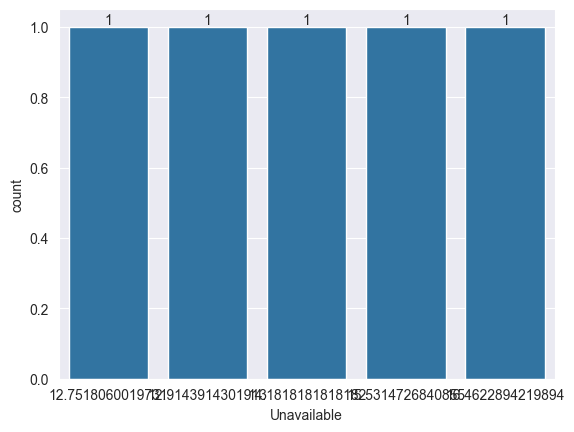

In [42]:
# plotting a bar chart for Unavailable
ax = sns.countplot(x='Unavailable', data=dataset)
for bars in ax.containers:
    ax.bar_label(bars)

#### Unavailable vs Affordable available

<Axes: xlabel='Unavailable', ylabel='Affordable_Available'>

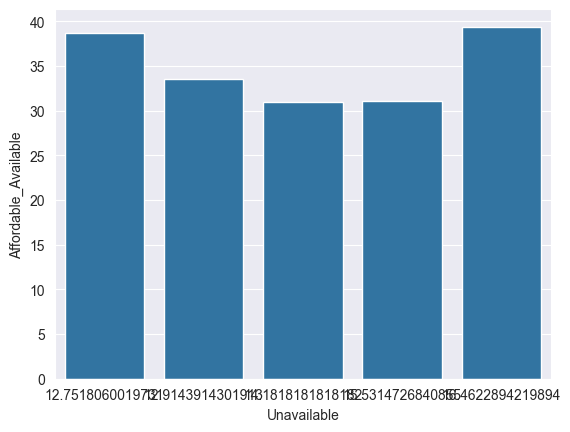

In [46]:
# ploatting a bar chart for unavailable vs affordable available
avail_unavail = dataset.groupby(['Unavailable'], as_index = False)['Affordable_Available'].sum().sort_values(by='Affordable_Available',ascending=False )
sns.barplot(x='Unavailable', y='Affordable_Available', data=avail_unavail)    

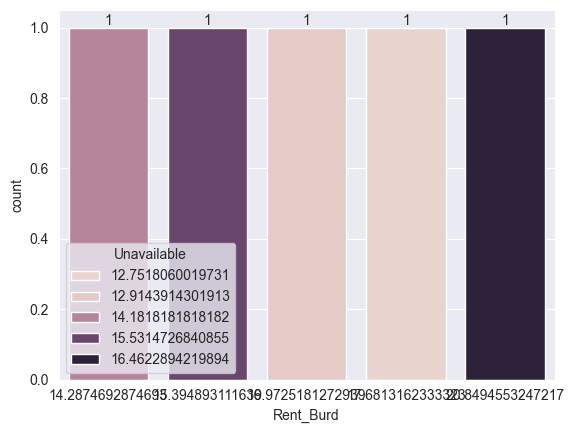

In [48]:
ax = sns.countplot(data = dataset, x = 'Rent_Burd', hue = 'Unavailable')
for bars in ax.containers:
    ax.bar_label(bars)

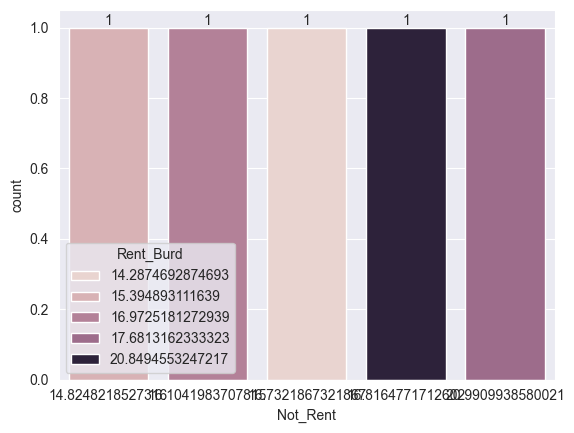

In [50]:
ax = sns.countplot(data=dataset, x='Not_Rent', hue='Rent_Burd')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Rent_Burd', ylabel='Not_Rent'>

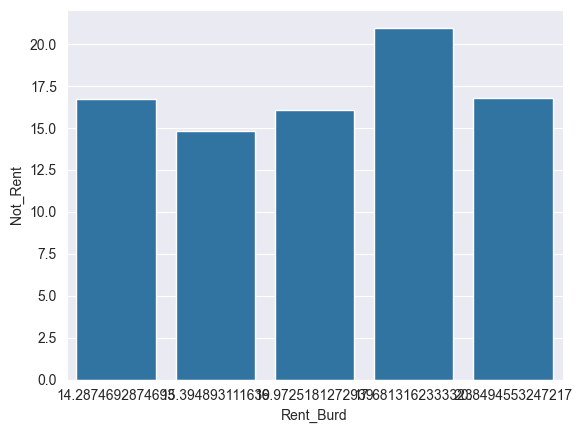

In [51]:
# Rent Burd vs Not Rent
Renting = dataset.groupby(['Rent_Burd'], as_index = False)['Not_Rent'].sum().sort_values(by='Rent_Burd',ascending=False)
sns.barplot(x= 'Rent_Burd', y='Not_Rent', data=Renting)

<Axes: xlabel='Affordable_Available', ylabel='Unavailable'>

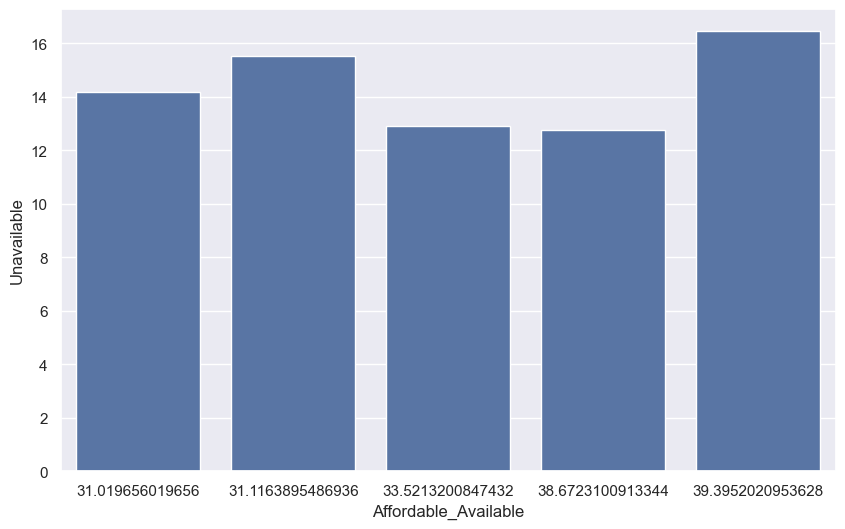

In [58]:
# affordable available
afford_avail = dataset.groupby(['Affordable_Available'], as_index = False)['Unavailable'].sum().sort_values(by='Unavailable',ascending=False )
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(data = afford_avail, x = 'Affordable_Available', y = 'Unavailable')

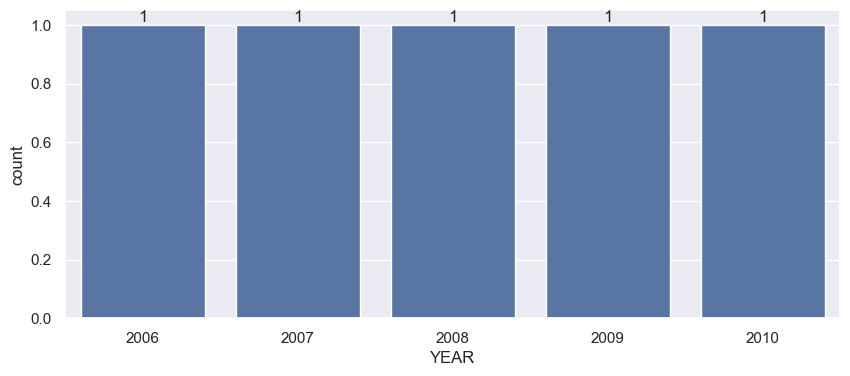

In [71]:
# Year plot
ax = sns.countplot(data = dataset, x = 'YEAR')
sns.set(rc={'figure.figsize':(10,6)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Rent_Burd', ylabel='Unavailable'>

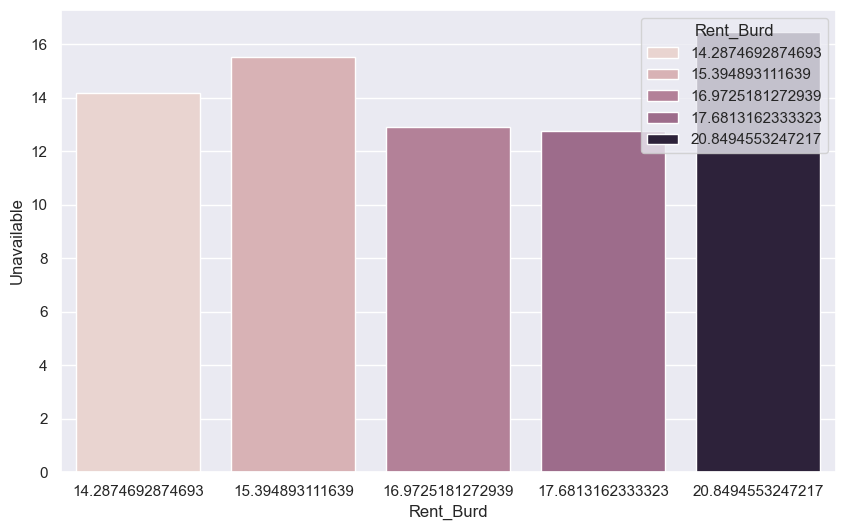

In [74]:
# year and rent burd
year_rent = dataset.groupby (['YEAR', 'Rent_Burd'],
                             as_index = False).sum().sort_values(by='Rent_Burd',ascending=False)
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(data = year_rent, x = 'Rent_Burd', y = 'Unavailable', hue ='Rent_Burd')